## Problem: Number of ways to build sturdy brick wall
LeetCode: 2184
https://leetcode.com/problems/number-of-ways-to-build-sturdy-brick-wall/



You are given integers height and width which specify the dimensions of a brick wall you are building. You are also given a 0-indexed array of unique integers bricks, where the ith brick has a height of 1 and a width of bricks[i]. You have an infinite supply of each type of brick and bricks may not be rotated.

Each row in the wall must be exactly width units long. For the wall to be sturdy, adjacent rows in the wall should not join bricks at the same location, except at the ends of the wall.

Return the number of ways to build a sturdy wall. Since the answer may be very large, return it modulo 109 + 7.

 

Example 1:

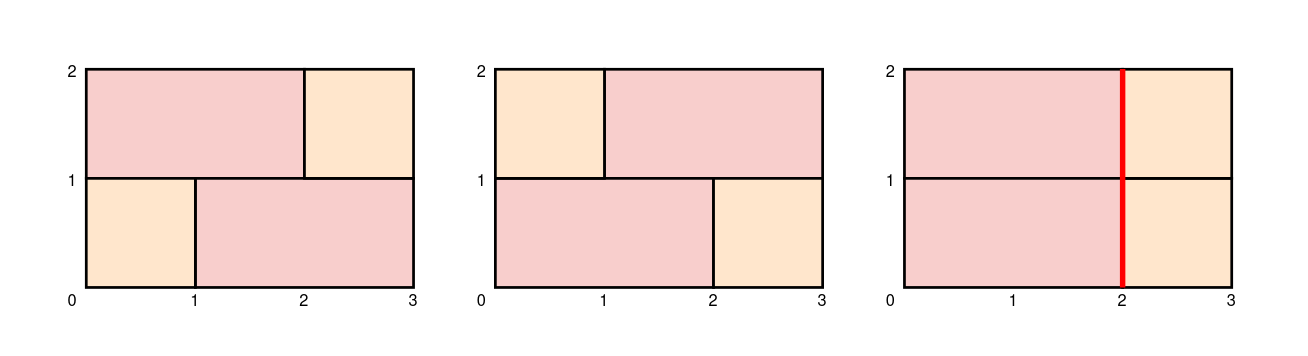

    Input: height = 2, width = 3, bricks = [1,2]
    Output: 2
    Explanation:
    The first two walls in the diagram show the only two ways to build a sturdy brick wall.
    Note that the third wall in the diagram is not sturdy because adjacent rows join bricks 2 units from the left.
Example 2:

    Input: height = 1, width = 1, bricks = [5]
    Output: 0
    Explanation:
    There are no ways to build a sturdy wall because the only type of brick we have is longer than the width of the wall.
 

Constraints:

    1 <= height <= 100
    1 <= width <= 10
    1 <= bricks.length <= 10
    1 <= bricks[i] <= 10
    All the values of bricks are unique.

In [11]:
## This is not yet solved. Caching is pending. Need to correct it.

def buildWall(height, width, bricks):
        # Find all posiible way to create 1st layer (height 1)
        possibleWays = []
        findPossibleWays(bricks, width, [], possibleWays)

        # Neighbour layer should not be same as previous layer.
        # So, for a given layer, create possible neighbour layers.
        # Use set to store all join location of ways1. If next ways also has 
        # same joint location then it can not be neibour of ways1, otherwise yes.
        # Will use map to store all possible neighbours of ways1...
        nebrs_map = {}
        for way in possibleWays:
            # we do not have consider last one, so will not consider last joint
            nebrs_map[way] = []
            s = set()
            cur = 0
            for w in way[:-1]:
                cur += w
                s.add(cur)
            
            # Take other ways and compare
            for way2 in possibleWays:
                cur = 0
                isSame = False
                for v in way2[:-1]:
                    cur += v
                    if cur in s:
                        isSame = True
                        break
                if not isSame:
                    nebrs_map[way].append(way2)
        # Next, will create a wall with all possible ways with its neighbours.

        ans = 0
        for way in possibleWays:
            ans += createWall(way, height, 1, nebrs_map)
        return ans


def createWall(way, height, curHeight, nebrs_map):
    if curHeight == height:
        return 1
    return sum(createWall(nebr, height,curHeight+1, nebrs_map) for nebr in nebrs_map[way])

def findPossibleWays(bricks, width, temp, possibleWays):
    if width == 0:
        possibleWays.append(tuple(temp)) # used tuple to make it hashable.
        return
    if width < 0:
        return
    for brick in bricks:
        findPossibleWays(bricks, width-brick, temp + [brick], possibleWays)

In [12]:
height = 2
width = 3
bricks = [1,2]
buildWall(height, width, bricks)

2

In [13]:
height = 1
width = 1
bricks = [5]
buildWall(height, width, bricks)

0